## Required libraries

In [ ]:
!pip install tsfel==0.1.3

     |████████████████████████████████| 45 kB 2.0 MB/s 
     |████████████████████████████████| 786 kB 13.4 MB/s 
     |████████████████████████████████| 368 kB 58.4 MB/s 
  Attempting uninstall: prompt-toolkit
    Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Attempting uninstall: ipython
    Found existing installation: ipython 5.5.0
    Uninstalling ipython-5.5.0:
      Successfully uninstalled ipython-5.5.0
  Attempting uninstall: gspread
    Found existing installation: gspread 3.0.1
    Uninstalling gspread-3.0.1:
      Successfully uninstalled gspread-3.0.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.19 which is incompatible.
google-colab 1.0.0 requires ipython

In [ ]:
!pip install kneed==0.7.0

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Loading dataset

In [ ]:
import pandas as pd

In [ ]:
url = '/content/gdrive/MyDrive/dataset_B.csv'
data = pd.read_csv(url)

In [ ]:
print(data)

              id                   timestamp  ...  Status              wheel_id
0       10162926  2019-07-15 20:04:19.000000  ...     1.0   2019-07-15T2P8497S1
1       10162927  2019-07-15 20:04:20.000000  ...     1.0   2019-07-15T2P8497S1
2       10162928  2019-07-15 20:04:21.000000  ...     1.0   2019-07-15T2P8497S1
3       10162929  2019-07-15 20:04:22.000000  ...     1.0   2019-07-15T2P8497S1
4       10162930  2019-07-15 20:04:23.000000  ...     1.0   2019-07-15T2P8497S1
...          ...                         ...  ...     ...                   ...
999102  13046890  2019-08-28 08:27:40.000000  ...     1.0  2019-08-28T1P8497S14
999103  13046891  2019-08-28 08:27:41.000000  ...     1.0  2019-08-28T1P8497S14
999104  13046892  2019-08-28 08:27:42.000000  ...     1.0  2019-08-28T1P8497S14
999105  13046893  2019-08-28 08:27:43.000000  ...     1.0  2019-08-28T1P8497S14
999106  13046894  2019-08-28 08:27:44.000000  ...     1.0  2019-08-28T1P8497S14

[999107 rows x 144 columns]


In [ ]:
data.head()

,id,timestamp,Temp_Channel1,Temp_Channel2,Temp_Metal,Temp_FurnaceChamber,Temp_Water,Temp_RootofSpoke,Temp_SprueBush,Flowrate_Air_channel1,Flowrate_Air_channel10,Flowrate_Air_channel11,Flowrate_Air_channel12,Flowrate_Air_channel2,Flowrate_Air_channel3,Flowrate_Air_channel4,Flowrate_Air_channel5,Flowrate_Air_channel6,Flowrate_Air_channel7,Flowrate_Air_channel8,Flowrate_Air_channel9,Pressure_cycle,tracebility_product1,tracebility_product2,tracebility_product3,correnter_POR,correntes_POR,correntet_POR,TimeCycle,consumo_POR_Energy_Consumption,product_id,Tool,shift,wheel_sequence,Wheel_numbers,sp_Wheel_numbers,Pressure_Compensation_CycleCounter,Pressure_Compensation_CycleCounter_Multiplier,Pressure_Compensation_CycleCounter_Total,Product_Counter,...,sp_Time_DelayAir_channel5,sp_Time_DelayAir_channel6,sp_Time_DelayAir_channel7,sp_Time_DelayAir_channel8,sp_Time_DelayAir_channel9,sp_Time_DurationWater_channel1,sp_Time_DurationAir_channel1,sp_Time_DurationAir_channel10,sp_Time_DurationAir_channel11,sp_Time_DurationAir_channel12,sp_Time_DurationWater_channel2,sp_Time_DurationAir_channel2,sp_Time_DurationWater_channel3,sp_Time_DurationAir_channel3,sp_Time_DurationAir_channel4,sp_Time_DurationAir_channel5,sp_Time_DurationAir_channel6,sp_Time_DurationAir_channel7,sp_Time_DurationAir_channel8,sp_Time_DurationAir_channel9,histerese_POR,sp_Temperatre_Zone1,sp_Temperatre_Zone2,sp_Temperatre_Zone3,sp_Temperatre_Zone4,sp_Flowrate_Air_channel1,sp_Flowrate_Air_channel10,sp_Flowrate_Air_channel11,sp_Flowrate_Air_channel12,sp_Flowrate_Air_channel2,sp_Flowrate_Air_channel3,sp_Flowrate_Air_channel4,sp_Flowrate_Air_channel5,sp_Flowrate_Air_channel6,sp_Flowrate_Air_channel7,sp_Flowrate_Air_channel8,sp_Flowrate_Air_channel9,Temp_Zone1,Status,wheel_id
0,10162926,2019-07-15 20:04:19.000000,469,455,703,0,26,384,431,0,0,0,0,0,0,0,0,0,0,0,0,14,74,0,68,53,55,55,0,35.761074,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
1,10162927,2019-07-15 20:04:20.000000,469,455,703,0,26,384,431,0,0,0,0,1,0,0,0,0,0,0,0,25,74,0,68,52,54,54,1,35.102894,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
2,10162928,2019-07-15 20:04:21.000000,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,75,74,0,68,52,54,53,3,34.444717,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
3,10162929,2019-07-15 20:04:22.000000,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,95,74,0,68,51,54,53,3,34.664112,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
4,10162930,2019-07-15 20:04:23.000000,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,114,74,0,68,52,54,54,5,35.102894,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1


In [ ]:
data[1:]

,id,timestamp,Temp_Channel1,Temp_Channel2,Temp_Metal,Temp_FurnaceChamber,Temp_Water,Temp_RootofSpoke,Temp_SprueBush,Flowrate_Air_channel1,Flowrate_Air_channel10,Flowrate_Air_channel11,Flowrate_Air_channel12,Flowrate_Air_channel2,Flowrate_Air_channel3,Flowrate_Air_channel4,Flowrate_Air_channel5,Flowrate_Air_channel6,Flowrate_Air_channel7,Flowrate_Air_channel8,Flowrate_Air_channel9,Pressure_cycle,tracebility_product1,tracebility_product2,tracebility_product3,correnter_POR,correntes_POR,correntet_POR,TimeCycle,consumo_POR_Energy_Consumption,product_id,Tool,shift,wheel_sequence,Wheel_numbers,sp_Wheel_numbers,Pressure_Compensation_CycleCounter,Pressure_Compensation_CycleCounter_Multiplier,Pressure_Compensation_CycleCounter_Total,Product_Counter,...,sp_Time_DelayAir_channel5,sp_Time_DelayAir_channel6,sp_Time_DelayAir_channel7,sp_Time_DelayAir_channel8,sp_Time_DelayAir_channel9,sp_Time_DurationWater_channel1,sp_Time_DurationAir_channel1,sp_Time_DurationAir_channel10,sp_Time_DurationAir_channel11,sp_Time_DurationAir_channel12,sp_Time_DurationWater_channel2,sp_Time_DurationAir_channel2,sp_Time_DurationWater_channel3,sp_Time_DurationAir_channel3,sp_Time_DurationAir_channel4,sp_Time_DurationAir_channel5,sp_Time_DurationAir_channel6,sp_Time_DurationAir_channel7,sp_Time_DurationAir_channel8,sp_Time_DurationAir_channel9,histerese_POR,sp_Temperatre_Zone1,sp_Temperatre_Zone2,sp_Temperatre_Zone3,sp_Temperatre_Zone4,sp_Flowrate_Air_channel1,sp_Flowrate_Air_channel10,sp_Flowrate_Air_channel11,sp_Flowrate_Air_channel12,sp_Flowrate_Air_channel2,sp_Flowrate_Air_channel3,sp_Flowrate_Air_channel4,sp_Flowrate_Air_channel5,sp_Flowrate_Air_channel6,sp_Flowrate_Air_channel7,sp_Flowrate_Air_channel8,sp_Flowrate_Air_channel9,Temp_Zone1,Status,wheel_id
1,10162927,2019-07-15 20:04:20.000000,469,455,703,0,26,384,431,0,0,0,0,1,0,0,0,0,0,0,0,25,74,0,68,52,54,54,1,35.102894,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
2,10162928,2019-07-15 20:04:21.000000,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,75,74,0,68,52,54,53,3,34.444717,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
3,10162929,2019-07-15 20:04:22.000000,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,95,74,0,68,51,54,53,3,34.664112,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
4,10162930,2019-07-15 20:04:23.000000,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,114,74,0,68,52,54,54,5,35.102894,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
5,10162931,2019-07-15 20:04:24.000000,468,454,703,0,26,383,431,0,0,0,1,1,0,0,0,0,0,0,0,164,74,0,68,50,52,51,6,34.444717,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,...,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0,2019-07-15T2P8497S1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999102,13046890,2019-08-28 08:27:40.00

## Dataset Description

In [ ]:
data.describe()

,id,Temp_Channel1,Temp_Channel2,Temp_Metal,Temp_FurnaceChamber,Temp_Water,Temp_RootofSpoke,Temp_SprueBush,Flowrate_Air_channel1,Flowrate_Air_channel10,Flowrate_Air_channel11,Flowrate_Air_channel12,Flowrate_Air_channel2,Flowrate_Air_channel3,Flowrate_Air_channel4,Flowrate_Air_channel5,Flowrate_Air_channel6,Flowrate_Air_channel7,Flowrate_Air_channel8,Flowrate_Air_channel9,Pressure_cycle,tracebility_product1,tracebility_product2,tracebility_product3,correnter_POR,correntes_POR,correntet_POR,TimeCycle,consumo_POR_Energy_Consumption,product_id,Tool,shift,wheel_sequence,Wheel_numbers,sp_Wheel_numbers,Pressure_Compensation_CycleCounter,Pressure_Compensation_CycleCounter_Multiplier,Pressure_Compensation_CycleCounter_Total,Product_Counter,sp_Pressure_channel1,...,sp_Time_DelayAir_channel4,sp_Time_DelayAir_channel5,sp_Time_DelayAir_channel6,sp_Time_DelayAir_channel7,sp_Time_DelayAir_channel8,sp_Time_DelayAir_channel9,sp_Time_DurationWater_channel1,sp_Time_DurationAir_channel1,sp_Time_DurationAir_channel10,sp_Time_DurationAir_channel11,sp_Time_DurationAir_channel12,sp_Time_DurationWater_channel2,sp_Time_DurationAir_channel2,sp_Time_DurationWater_channel3,sp_Time_DurationAir_channel3,sp_Time_DurationAir_channel4,sp_Time_DurationAir_channel5,sp_Time_DurationAir_channel6,sp_Time_DurationAir_channel7,sp_Time_DurationAir_channel8,sp_Time_DurationAir_channel9,histerese_POR,sp_Temperatre_Zone1,sp_Temperatre_Zone2,sp_Temperatre_Zone3,sp_Temperatre_Zone4,sp_Flowrate_Air_channel1,sp_Flowrate_Air_channel10,sp_Flowrate_Air_channel11,sp_Flowrate_Air_channel12,sp_Flowrate_Air_channel2,sp_Flowrate_Air_channel3,sp_Flowrate_Air_channel4,sp_Flowrate_Air_channel5,sp_Flowrate_Air_channel6,sp_Flowrate_Air_channel7,sp_Flowrate_Air_channel8,sp_Flowrate_Air_channel9,Temp_Zone1,Status
count,9.991070e+05,999107.000000,999107.000000,999107.000000,999107.0,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.0,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,...,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.00000,999107.0,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.0,999107.0,999107.0,999107.0,999107.0,999107.000000,999107.000000,999107.000000,999107.000000,999107.00000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.000000,999107.0,999107.000000
mean,1.199265e+07,23333.170426,4680.069449,711.137621,0.0,24.445481,445.943535,425.756868,36.584230,23.869580,57.655533,58.054857,42.600116,42.294786,50.360502,50.624839,33.406099,22.840435,0.943984,54.799748,646.052982,77.910558,66.864835,58.752701,44.022349,46.156428,46.047134,117.665722,29.886756,8497.0,4.207909,1.960691,51.894834,10.099130,33.049527,8.970796,2.827184,25.522542,203.525003,194.185588,...,52.851306,52.996336,56.672348,46.081000,1.907363,62.392156,136.756814,92.037114,57.983579,152.925272,153.65037,0.0,105.091116,26.292689,103.640821,131.619206,132.489258,101.386473,80.074927,2.967010,138.914751,0.0,0.0,0.0,0.0,0.0,94.162497,89.861982,89.145082,89.275578,92.59812,91.181400,90.631749,90.684331,79.011392,68.745475,1.695434,93.649129,0.0,0.953861
std,7.485635e+05,30002.389632,15573.810965,3.690518,0.0,1.122303,216.229200,13.241571,45.886471,36.903615,42.286419,42.213761,44.466377,44.168425,45.467552,44.724538,39.096481,32.658110,8.614283,45.970904,480.356440,43.159636,47.373168,39.818496,16.148132,17.382575,17.422017,68.853711,11.173545,0.0,0.405811,0.801010,32.674569,6.823917,4.609268,6.475452,0.378089,19.

In [ ]:
data.dtypes == "object"

id                          False
timestamp                    True
Temp_Channel1               False
Temp_Channel2               False
Temp_Metal                  False
                            ...  
sp_Flowrate_Air_channel8    False
sp_Flowrate_Air_channel9    False
Temp_Zone1                  False
Status                      False
wheel_id                     True
Length: 144, dtype: bool

## Feature identification

In [ ]:
num_vars=data.columns[data.dtypes != "object"]
cat_vars=data.columns[data.dtypes == "object"]

print(num_vars)
print(cat_vars)

Index(['id', 'Temp_Channel1', 'Temp_Channel2', 'Temp_Metal',
       'Temp_FurnaceChamber', 'Temp_Water', 'Temp_RootofSpoke',
       'Temp_SprueBush', 'Flowrate_Air_channel1', 'Flowrate_Air_channel10',
       ...
       'sp_Flowrate_Air_channel2', 'sp_Flowrate_Air_channel3',
       'sp_Flowrate_Air_channel4', 'sp_Flowrate_Air_channel5',
       'sp_Flowrate_Air_channel6', 'sp_Flowrate_Air_channel7',
       'sp_Flowrate_Air_channel8', 'sp_Flowrate_Air_channel9', 'Temp_Zone1',
       'Status'],
      dtype='object', length=142)
Index(['timestamp', 'wheel_id'], dtype='object')


In [ ]:
data[num_vars]

,id,Temp_Channel1,Temp_Channel2,Temp_Metal,Temp_FurnaceChamber,Temp_Water,Temp_RootofSpoke,Temp_SprueBush,Flowrate_Air_channel1,Flowrate_Air_channel10,Flowrate_Air_channel11,Flowrate_Air_channel12,Flowrate_Air_channel2,Flowrate_Air_channel3,Flowrate_Air_channel4,Flowrate_Air_channel5,Flowrate_Air_channel6,Flowrate_Air_channel7,Flowrate_Air_channel8,Flowrate_Air_channel9,Pressure_cycle,tracebility_product1,tracebility_product2,tracebility_product3,correnter_POR,correntes_POR,correntet_POR,TimeCycle,consumo_POR_Energy_Consumption,product_id,Tool,shift,wheel_sequence,Wheel_numbers,sp_Wheel_numbers,Pressure_Compensation_CycleCounter,Pressure_Compensation_CycleCounter_Multiplier,Pressure_Compensation_CycleCounter_Total,Product_Counter,sp_Pressure_channel1,...,sp_Time_DelayAir_channel4,sp_Time_DelayAir_channel5,sp_Time_DelayAir_channel6,sp_Time_DelayAir_channel7,sp_Time_DelayAir_channel8,sp_Time_DelayAir_channel9,sp_Time_DurationWater_channel1,sp_Time_DurationAir_channel1,sp_Time_DurationAir_channel10,sp_Time_DurationAir_channel11,sp_Time_DurationAir_channel12,sp_Time_DurationWater_channel2,sp_Time_DurationAir_channel2,sp_Time_DurationWater_channel3,sp_Time_DurationAir_channel3,sp_Time_DurationAir_channel4,sp_Time_DurationAir_channel5,sp_Time_DurationAir_channel6,sp_Time_DurationAir_channel7,sp_Time_DurationAir_channel8,sp_Time_DurationAir_channel9,histerese_POR,sp_Temperatre_Zone1,sp_Temperatre_Zone2,sp_Temperatre_Zone3,sp_Temperatre_Zone4,sp_Flowrate_Air_channel1,sp_Flowrate_Air_channel10,sp_Flowrate_Air_channel11,sp_Flowrate_Air_channel12,sp_Flowrate_Air_channel2,sp_Flowrate_Air_channel3,sp_Flowrate_Air_channel4,sp_Flowrate_Air_channel5,sp_Flowrate_Air_channel6,sp_Flowrate_Air_channel7,sp_Flowrate_Air_channel8,sp_Flowrate_Air_channel9,Temp_Zone1,Status
0,10162926,469,455,703,0,26,384,431,0,0,0,0,0,0,0,0,0,0,0,0,14,74,0,68,53,55,55,0,35.761074,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,160.0,...,80.0,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0
1,10162927,469,455,703,0,26,384,431,0,0,0,0,1,0,0,0,0,0,0,0,25,74,0,68,52,54,54,1,35.102894,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,160.0,...,80.0,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0
2,10162928,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,75,74,0,68,52,54,53,3,34.444717,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,160.0,...,80.0,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0
3,10162929,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,95,74,0,68,51,54,53,3,34.664112,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,160.0,...,80.0,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0
4,10162930,468,454,703,0,26,383,431,0,0,0,0,1,0,0,0,0,0,0,0,114,74,0,68,52,54,54,5,35.102894,8497.0,5.0,2,1,0.0,30.0,0.0,3.0,0.0,142.0,160.0,...,80.0,80.0,80.0,70.0,0.0,100.0,110.0,65.0,40.0,100.0,100.0,0.0,80.0,10.0,80.0,120.0,120.0,90.0,80.0,0.0,120.0,0.0,0.0,0.0,0.0,0.0,90.0,90.0,90.0,90.0,90.0,90.0,90.0,80.0,80.0,70.0,0.0,90.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999102,13046890,62260,479,713,0,24,427,414,0,0,0,0,0,0,0,0,0,0,0,0,17,14,0,81,61,64,64,0,41.465298,8497.0,4.0,1,14,15.0,30.0,14.0,3.0,42.0,95.0,200.0,...,45.0,45.0,50.0,40.0,0.0,50.0,145.0,10

In [ ]:
%reload_ext google.colab.data_table
data[num_vars].isnull()

,id,Temp_Channel1,Temp_Channel2,Temp_Metal,Temp_FurnaceChamber,Temp_Water,Temp_RootofSpoke,Temp_SprueBush,Flowrate_Air_channel1,Flowrate_Air_channel10,Flowrate_Air_channel11,Flowrate_Air_channel12,Flowrate_Air_channel2,Flowrate_Air_channel3,Flowrate_Air_channel4,Flowrate_Air_channel5,Flowrate_Air_channel6,Flowrate_Air_channel7,Flowrate_Air_channel8,Flowrate_Air_channel9,Pressure_cycle,tracebility_product1,tracebility_product2,tracebility_product3,correnter_POR,correntes_POR,correntet_POR,TimeCycle,consumo_POR_Energy_Consumption,product_id,Tool,shift,wheel_sequence,Wheel_numbers,sp_Wheel_numbers,Pressure_Compensation_CycleCounter,Pressure_Compensation_CycleCounter_Multiplier,Pressure_Compensation_CycleCounter_Total,Product_Counter,sp_Pressure_channel1,...,sp_Time_DelayAir_channel4,sp_Time_DelayAir_channel5,sp_Time_DelayAir_channel6,sp_Time_DelayAir_channel7,sp_Time_DelayAir_channel8,sp_Time_DelayAir_channel9,sp_Time_DurationWater_channel1,sp_Time_DurationAir_channel1,sp_Time_DurationAir_channel10,sp_Time_DurationAir_channel11,sp_Time_DurationAir_channel12,sp_Time_DurationWater_channel2,sp_Time_DurationAir_channel2,sp_Time_DurationWater_channel3,sp_Time_DurationAir_channel3,sp_Time_DurationAir_channel4,sp_Time_DurationAir_channel5,sp_Time_DurationAir_channel6,sp_Time_DurationAir_channel7,sp_Time_DurationAir_channel8,sp_Time_DurationAir_channel9,histerese_POR,sp_Temperatre_Zone1,sp_Temperatre_Zone2,sp_Temperatre_Zone3,sp_Temperatre_Zone4,sp_Flowrate_Air_channel1,sp_Flowrate_Air_channel10,sp_Flowrate_Air_channel11,sp_Flowrate_Air_channel12,sp_Flowrate_Air_channel2,sp_Flowrate_Air_channel3,sp_Flowrate_Air_channel4,sp_Flowrate_Air_channel5,sp_Flowrate_Air_channel6,sp_Flowrate_Air_channel7,sp_Flowrate_Air_channel8,sp_Flowrate_Air_channel9,Temp_Zone1,Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,

## Check for the missing data

In [ ]:
data[num_vars].isnull().sum()

id                          0
Temp_Channel1               0
Temp_Channel2               0
Temp_Metal                  0
Temp_FurnaceChamber         0
                           ..
sp_Flowrate_Air_channel7    0
sp_Flowrate_Air_channel8    0
sp_Flowrate_Air_channel9    0
Temp_Zone1                  0
Status                      0
Length: 142, dtype: int64

In [ ]:
print(data[num_vars].isnull().sum().sort_values(ascending=False))

Status                                            0
sp_Pressure_channel5                              0
sp_Time_Step_channel1                             0
emporetarsolid_POR_Solidification_Time_Measure    0
sp_Pressure_channel9                              0
                                                 ..
sp_Time_DelayWater_channel3                       0
sp_Time_DelayAir_channel3                         0
sp_Time_DelayAir_channel4                         0
sp_Time_DelayAir_channel5                         0
id                                                0
Length: 142, dtype: int64


In [ ]:
len(data)

999107

## Distribution plots (numerical features)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf63ecba90>,
      dtype=object)

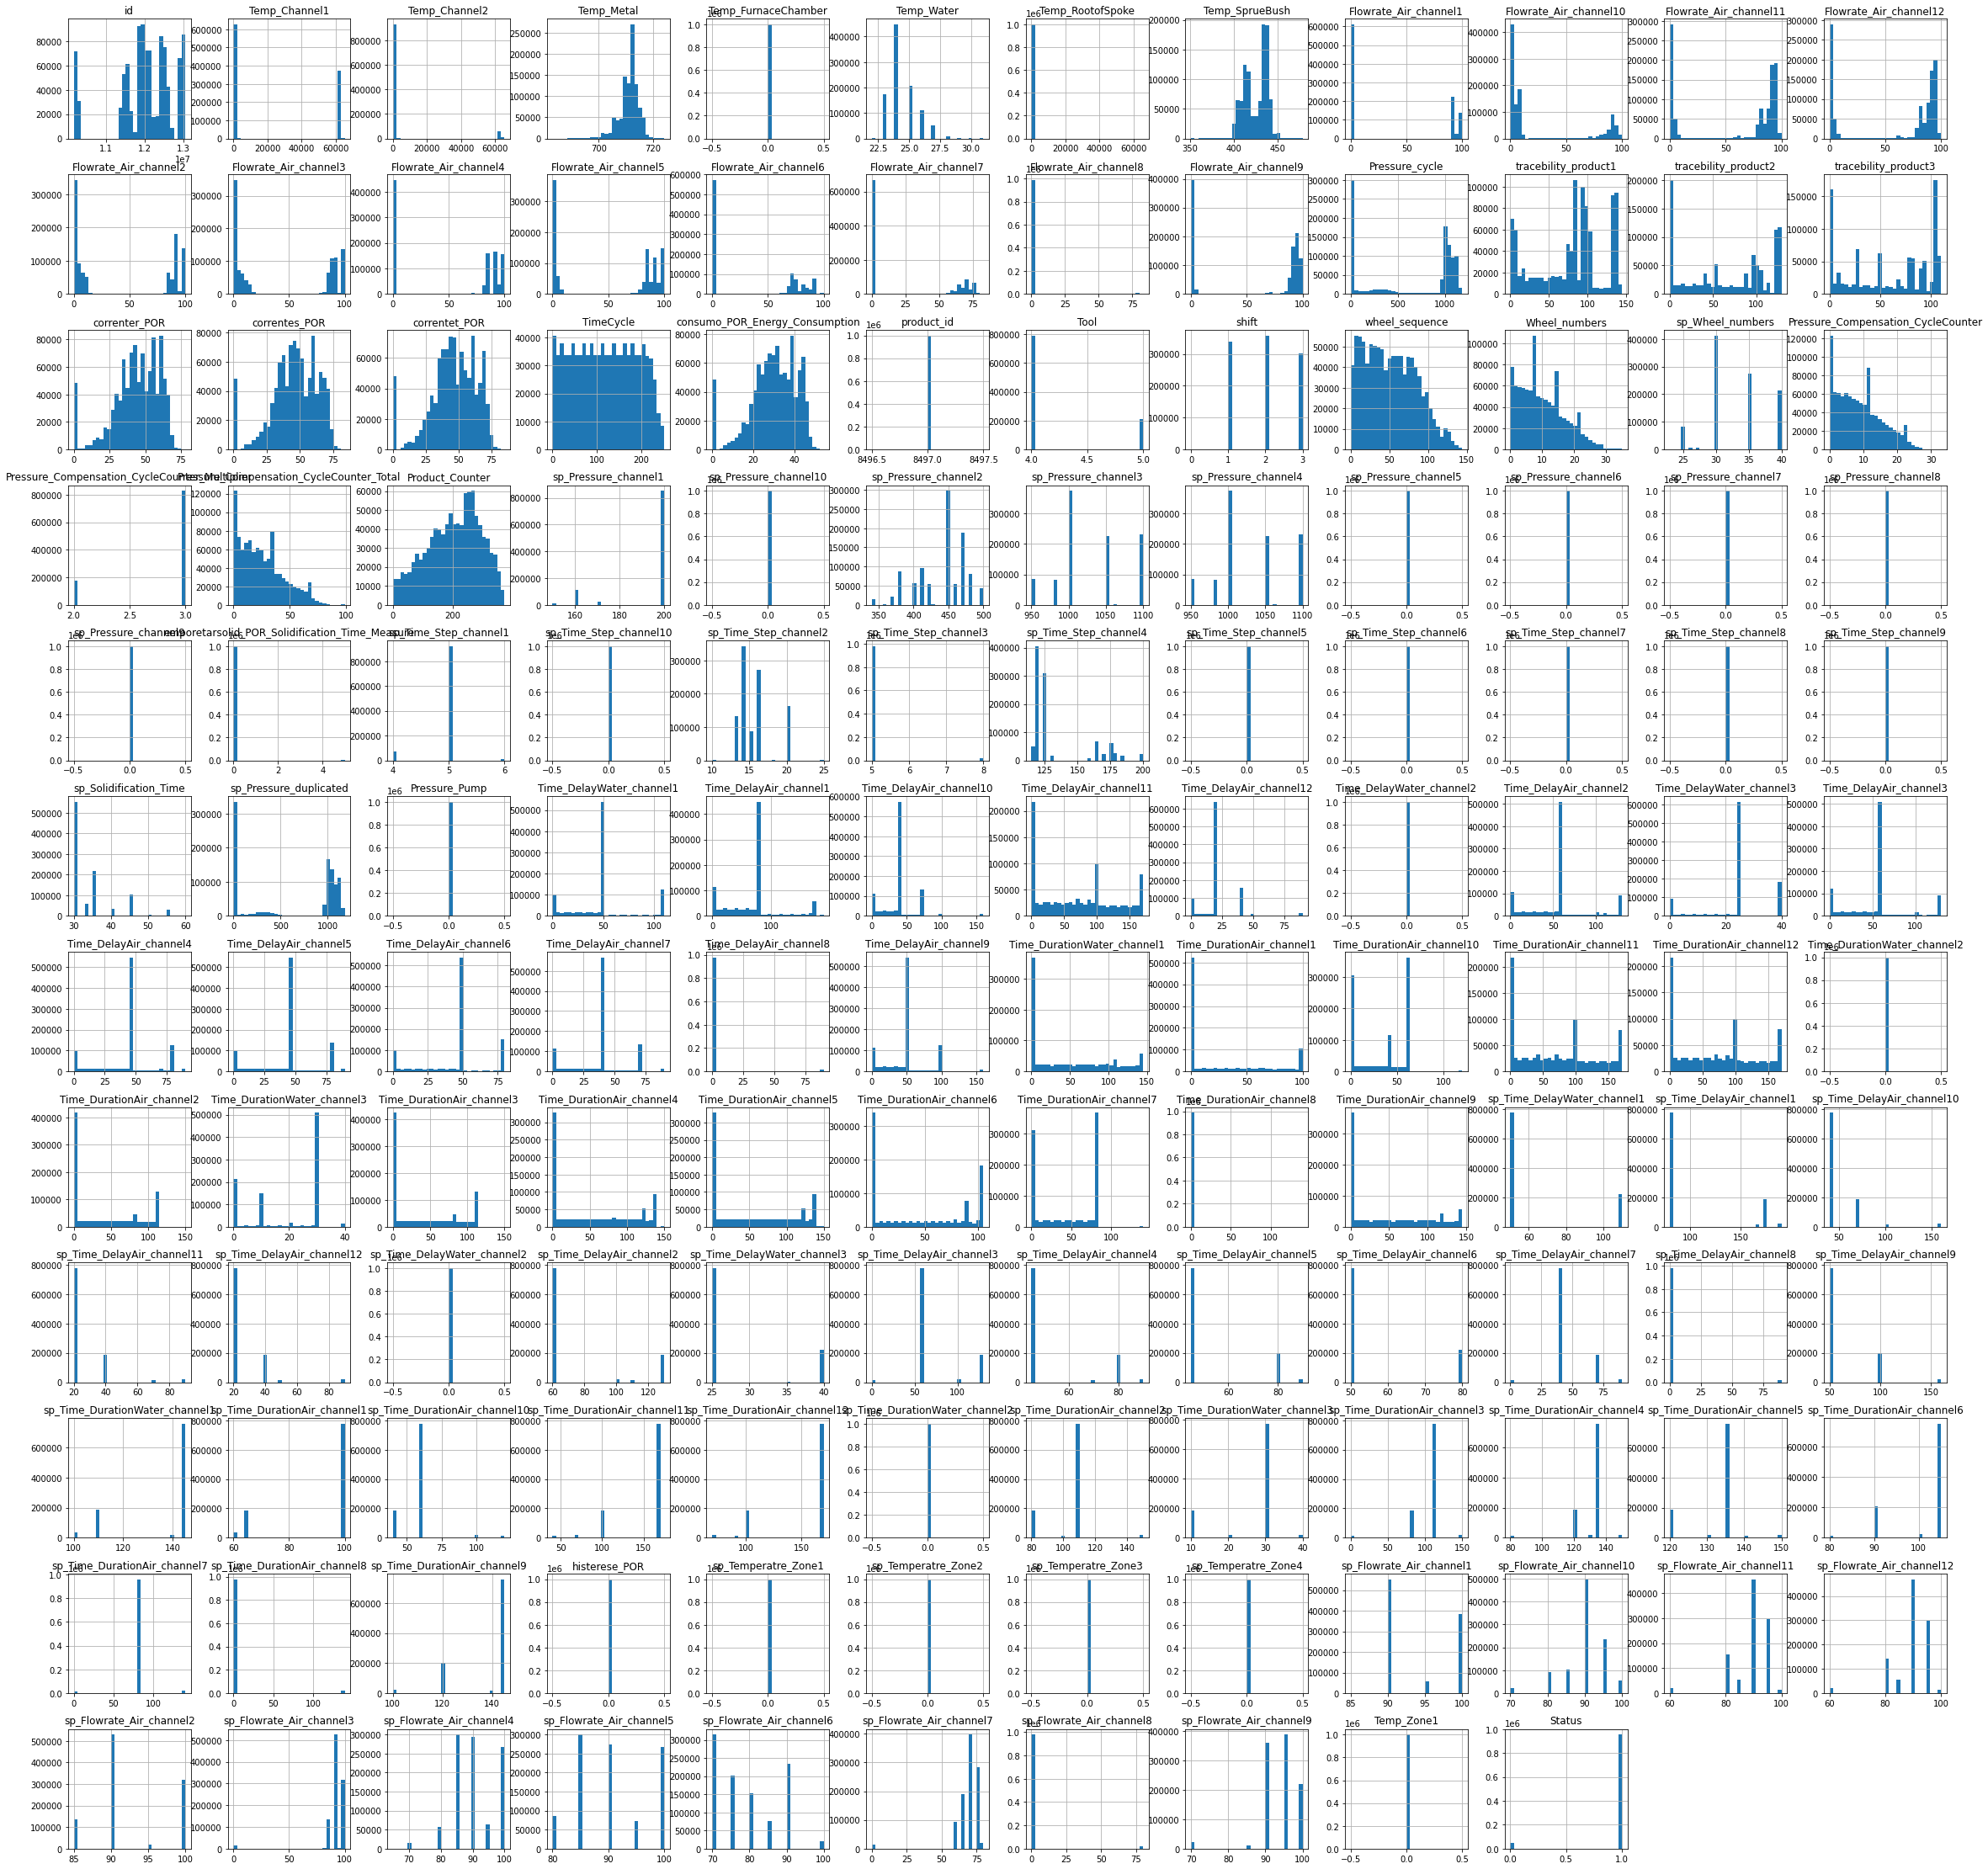

In [ ]:
data.hist(bins=30, figsize=(40, 40))

In [ ]:
print(data["Temp_Metal"].astype(float).skew())
print(data["Temp_Metal"].astype(float).kurt())

-1.3550541717837201
3.6273410767490106


In [ ]:
ignore = ["Pressure_Compensation_CycleCounter",
          "Pressure_Pump",
          "Pressure_Compensation_CycleCounter_Multiplier",
          "Pressure_Compensation_CycleCounter_Total",
          "sp_Pressure_duplicated"]

data.drop(ignore, axis=1, inplace=True)

In [ ]:
w_ids = data["wheel_id"].unique()
print(w_ids)
len(w_ids)

['2019-07-15T2P8497S1' '2019-07-15T2P8497S2' '2019-07-15T2P8497S3' ...
 '2019-08-28T1P8497S12' '2019-08-28T1P8497S13' '2019-08-28T1P8497S14']


4296

In [ ]:
w_id = '2019-07-15T2P8497S1'
wheel = data[data["wheel_id"] == w_id]

## Temperature feature extraction

In [ ]:
z=1
TMAXC1=[]
TMINC1=[]
TAVGC1=[]
TDEVC1=[]
TMAXC2=[]
TMINC2=[]
TAVGC2=[]
TDEVC2=[]
TMAXRS=[]
TMINRS=[]
TAVGRS=[]
TDEVRS=[]
TMAXSB=[]
TMINSB=[]
TAVGSB=[]
TDEVSB=[]
STATUS=[]
A1MAX=[]
A1MIN=[]
A1AREA=[]
A2MAX=[]
A2MIN=[]
A2AREA=[]
A3MAX=[]
A3MIN=[]
A3AREA=[]
A4MAX=[]
A4MIN=[]
A4AREA=[]
A5MAX=[]
A5MIN=[]
A5AREA=[]
A6MAX=[]
A6MIN=[]
A6AREA=[]
A7MAX=[]
A7MIN=[]
A7AREA=[]

A9MAX=[]
A9MIN=[]
A9AREA=[]
A10MAX=[]
A10MIN=[]
A10AREA=[]
A11MAX=[]
A11MIN=[]
A11AREA=[]
A1_start=[]
A2_start=[]
A3_start=[]
A4_start=[]
A5_start=[]
A6_start=[]
A7_start=[]

A9_start=[]
A10_start=[]
A11_start=[]
A1_end=[]
A2_end=[]
A3_end=[]
A4_end=[]
A5_end=[]
A6_end=[]
A7_end=[]

A9_end=[]
A10_end=[]
A11_end=[]

for i in w_ids:
  wheel = data[data["wheel_id"] == i]
  #print("###################",z,"###################")
  temperature_columns = [
  'Temp_Channel1',
  'Temp_Channel2',
  'Temp_RootofSpoke',
  'Temp_SprueBush'
  ]

  air_columns = [
  'Flowrate_Air_channel1',
  'Flowrate_Air_channel2',
  'Flowrate_Air_channel3',
  'Flowrate_Air_channel4',
  'Flowrate_Air_channel5',
  'Flowrate_Air_channel6',
  'Flowrate_Air_channel7',
  'Flowrate_Air_channel9',
  'Flowrate_Air_channel10',
  'Flowrate_Air_channel11'

  ]
  
  #print("MAX")
  #print(wheel[temperature_columns].max())
  for j in range(0,len(temperature_columns),4):
    TMAXC1.append(wheel[temperature_columns[j]].max())
    TMAXC2.append(wheel[temperature_columns[j+1]].max())
    TMAXRS.append(wheel[temperature_columns[j+2]].max())
    TMAXSB.append(wheel[temperature_columns[j+3]].max())
    #print("MIN")
    #print(wheel[temperature_columns].min())
    TMINC1.append(wheel[temperature_columns[j]].min())
    TMINC2.append(wheel[temperature_columns[j+1]].min())
    TMINRS.append(wheel[temperature_columns[j+2]].min())
    TMINSB.append(wheel[temperature_columns[j+3]].min())
    #print("AVERAGE")
    #print(wheel[temperature_columns].mean())
    TAVGC1.append(wheel[temperature_columns[j]].mean())
    TAVGC2.append(wheel[temperature_columns[j+1]].mean())
    TAVGRS.append(wheel[temperature_columns[j+2]].mean())
    TAVGSB.append(wheel[temperature_columns[j+3]].mean())
    #print("Deviation")
    #print(wheel[temperature_columns].max()-wheel[temperature_columns].min())
    TDEVC1.append(wheel[temperature_columns[j]].max()-wheel[temperature_columns[j]].min())
    TDEVC2.append(wheel[temperature_columns[j+1]].max()-wheel[temperature_columns[j+1]].min())
    TDEVRS.append(wheel[temperature_columns[j+2]].max()-wheel[temperature_columns[j+2]].min())
    TDEVSB.append(wheel[temperature_columns[j+3]].max()-wheel[temperature_columns[j+3]].min())


  for j in range(0,len(air_columns),10):
    #Pressure values
    A1MAX.append(wheel[air_columns[j]].max())
    A2MAX.append(wheel[air_columns[j+1]].max())
    A3MAX.append(wheel[air_columns[j+2]].max())
    A4MAX.append(wheel[air_columns[j+3]].max())
    A5MAX.append(wheel[air_columns[j+4]].max())
    A6MAX.append(wheel[air_columns[j+5]].max())
    A7MAX.append(wheel[air_columns[j+6]].max())
    A9MAX.append(wheel[air_columns[j+7]].max())
    A10MAX.append(wheel[air_columns[j+8]].max())
    A11MAX.append(wheel[air_columns[j+9]].max())
    #print("MIN")
    #print(wheel[temperature_columns].min())
    A1MIN.append(wheel[air_columns[j]].min())
    A2MIN.append(wheel[air_columns[j+1]].min())
    A3MIN.append(wheel[air_columns[j+2]].min())
    A4MIN.append(wheel[air_columns[j+3]].min())
    A5MIN.append(wheel[air_columns[j+4]].min())
    A6MIN.append(wheel[air_columns[j+5]].min())
    A7MIN.append(wheel[air_columns[j+6]].min())
    A9MIN.append(wheel[air_columns[j+7]].min())
    A10MIN.append(wheel[air_columns[j+8]].min())
    A11MIN.append(wheel[air_columns[j+9]].min())
    #print("Area under the curve")
    A1AREA.append(wheel[air_columns[j]].sum())
    A2AREA.append(wheel[air_columns[j+1]].sum())
    A3AREA.append(wheel[air_columns[j+2]].sum())
    A4AREA.append(wheel[air_columns[j+3]].sum())
    A5AREA.append(wheel[air_columns[j+4]].sum())
    A6AREA.append(wheel[air_columns[j+5]].sum())
    A7AREA.append(wheel[air_columns[j+6]].sum())
    A9AREA.append(wheel[air_columns[j+7]].sum())
    A10AREA.append(wheel[air_columns[j+8]].sum())
    A11AREA.append(wheel[air_columns[j+9]].sum())

    for w in range(0,len(list(wheel[air_columns[j]]))-1):
      if list(wheel[air_columns[j]])[w+1]-list(wheel[air_columns[j]])[w]>40:
        A1_start.append(w)
      if list(wheel[air_columns[j]])[w+1]-list(wheel[air_columns[j]])[w]<-40:
        A1_end.append(w)

      if list(wheel[air_columns[j+1]])[w+1]-list(wheel[air_columns[j+1]])[w]>40:
        A2_start.append(w)
      if list(wheel[air_columns[j+1]])[w+1]-list(wheel[air_columns[j+1]])[w]<-40:
        A2_end.append(w)

      if list(wheel[air_columns[j+2]])[w+1]-list(wheel[air_columns[j+1]])[w]>40:
        A3_start.append(w)
      if list(wheel[air_columns[j+2]])[w+1]-list(wheel[air_columns[j+1]])[w]<-40:
        A3_end.append(w)

      if list(wheel[air_columns[j+3]])[w+1]-list(wheel[air_columns[j+3]])[w]>40:
        A4_start.append(w)
      if list(wheel[air_columns[j+3]])[w+1]-list(wheel[air_columns[j+3]])[w]<-40:
        A4_end.append(w)

      if list(wheel[air_columns[j+4]])[w+1]-list(wheel[air_columns[j+4]])[w]>40:
        A5_start.append(w)
      if list(wheel[air_columns[j+4]])[w+1]-list(wheel[air_columns[j+4]])[w]<-40:
        A5_end.append(w)

      if list(wheel[air_columns[j+5]])[w+1]-list(wheel[air_columns[j+5]])[w]>40:
        A6_start.append(w)
      if list(wheel[air_columns[j+5]])[w+1]-list(wheel[air_columns[j+5]])[w]<-40:
        A6_end.append(w)

      if list(wheel[air_columns[j+6]])[w+1]-list(wheel[air_columns[j+6]])[w]>40:
        A7_start.append(w)
      if list(wheel[air_columns[j+6]])[w+1]-list(wheel[air_columns[j+6]])[w]<-40:
        A7_end.append(w)

      if list(wheel[air_columns[j+7]])[w+1]-list(wheel[air_columns[j+7]])[w]>40:
        A9_start.append(w)
      if list(wheel[air_columns[j+7]])[w+1]-list(wheel[air_columns[j+7]])[w]<-40:
        A9_end.append(w)

      if list(wheel[air_columns[j+8]])[w+1]-list(wheel[air_columns[j+8]])[w]>40:
        A10_start.append(w)
      if list(wheel[air_columns[j+8]])[w+1]-list(wheel[air_columns[j+8]])[w]<-40:
        A10_end.append(w)

      if list(wheel[air_columns[j+9]])[w+1]-list(wheel[air_columns[j+9]])[w]>40:
        A11_start.append(w)
      if list(wheel[air_columns[j+9]])[w+1]-list(wheel[air_columns[j+9]])[w]<-40:
        A11_end.append(w)

  STATUS.append(wheel['Status'].max())
  z+=1

##Air flow channel feature extraction

In [ ]:
z=1
TMAXC1=[]
TMINC1=[]
TAVGC1=[]
TDEVC1=[]
TMAXC2=[]
TMINC2=[]
TAVGC2=[]
TDEVC2=[]
TMAXRS=[]
TMINRS=[]
TAVGRS=[]
TDEVRS=[]
TMAXSB=[]
TMINSB=[]
TAVGSB=[]
TDEVSB=[]
STATUS=[]
A1MAX=[]
A1MIN=[]
A1AREA=[]
A2MAX=[]
A2MIN=[]
A2AREA=[]
A3MAX=[]
A3MIN=[]
A3AREA=[]
A4MAX=[]
A4MIN=[]
A4AREA=[]
A5MAX=[]
A5MIN=[]
A5AREA=[]
A6MAX=[]
A6MIN=[]
A6AREA=[]
A7MAX=[]
A7MIN=[]
A7AREA=[]

A9MAX=[]
A9MIN=[]
A9AREA=[]
A10MAX=[]
A10MIN=[]
A10AREA=[]
A11MAX=[]
A11MIN=[]
A11AREA=[]


for i in w_ids:
  wheel = data[data["wheel_id"] == i]
  #print("###################",z,"###################")
  temperature_columns = [
  'Temp_Channel1',
  'Temp_Channel2',
  'Temp_RootofSpoke',
  'Temp_SprueBush'
  ]

  air_columns = [
  'Flowrate_Air_channel1',
  'Flowrate_Air_channel2',
  'Flowrate_Air_channel3',
  'Flowrate_Air_channel4',
  'Flowrate_Air_channel5',
  'Flowrate_Air_channel6',
  'Flowrate_Air_channel7',
  'Flowrate_Air_channel9',
  'Flowrate_Air_channel10',
  'Flowrate_Air_channel11'

  ]
  
  #print("MAX")
  #print(wheel[temperature_columns].max())
  for j in range(0,len(temperature_columns),4):
    TMAXC1.append(wheel[temperature_columns[j]].max())
    TMAXC2.append(wheel[temperature_columns[j+1]].max())
    TMAXRS.append(wheel[temperature_columns[j+2]].max())
    TMAXSB.append(wheel[temperature_columns[j+3]].max())
    #print("MIN")
    #print(wheel[temperature_columns].min())
    TMINC1.append(wheel[temperature_columns[j]].min())
    TMINC2.append(wheel[temperature_columns[j+1]].min())
    TMINRS.append(wheel[temperature_columns[j+2]].min())
    TMINSB.append(wheel[temperature_columns[j+3]].min())
    #print("AVERAGE")
    #print(wheel[temperature_columns].mean())
    TAVGC1.append(wheel[temperature_columns[j]].mean())
    TAVGC2.append(wheel[temperature_columns[j+1]].mean())
    TAVGRS.append(wheel[temperature_columns[j+2]].mean())
    TAVGSB.append(wheel[temperature_columns[j+3]].mean())
    #print("Deviation")
    #print(wheel[temperature_columns].max()-wheel[temperature_columns].min())
    TDEVC1.append(wheel[temperature_columns[j]].max()-wheel[temperature_columns[j]].min())
    TDEVC2.append(wheel[temperature_columns[j+1]].max()-wheel[temperature_columns[j+1]].min())
    TDEVRS.append(wheel[temperature_columns[j+2]].max()-wheel[temperature_columns[j+2]].min())
    TDEVSB.append(wheel[temperature_columns[j+3]].max()-wheel[temperature_columns[j+3]].min())


  for j in range(0,len(air_columns),10):
    #Pressure values
    A1MAX.append(wheel[air_columns[j]].max())
    A2MAX.append(wheel[air_columns[j+1]].max())
    A3MAX.append(wheel[air_columns[j+2]].max())
    A4MAX.append(wheel[air_columns[j+3]].max())
    A5MAX.append(wheel[air_columns[j+4]].max())
    A6MAX.append(wheel[air_columns[j+5]].max())
    A7MAX.append(wheel[air_columns[j+6]].max())
    A9MAX.append(wheel[air_columns[j+7]].max())
    A10MAX.append(wheel[air_columns[j+8]].max())
    A11MAX.append(wheel[air_columns[j+9]].max())
    #print("MIN")
    #print(wheel[temperature_columns].min())
    A1MIN.append(wheel[air_columns[j]].min())
    A2MIN.append(wheel[air_columns[j+1]].min())
    A3MIN.append(wheel[air_columns[j+2]].min())
    A4MIN.append(wheel[air_columns[j+3]].min())
    A5MIN.append(wheel[air_columns[j+4]].min())
    A6MIN.append(wheel[air_columns[j+5]].min())
    A7MIN.append(wheel[air_columns[j+6]].min())
    A9MIN.append(wheel[air_columns[j+7]].min())
    A10MIN.append(wheel[air_columns[j+8]].min())
    A11MIN.append(wheel[air_columns[j+9]].min())
    #print("Area under the curve")
    A1AREA.append(wheel[air_columns[j]].sum())
    A2AREA.append(wheel[air_columns[j+1]].sum())
    A3AREA.append(wheel[air_columns[j+2]].sum())
    A4AREA.append(wheel[air_columns[j+3]].sum())
    A5AREA.append(wheel[air_columns[j+4]].sum())
    A6AREA.append(wheel[air_columns[j+5]].sum())
    A7AREA.append(wheel[air_columns[j+6]].sum())
    A9AREA.append(wheel[air_columns[j+7]].sum())
    A10AREA.append(wheel[air_columns[j+8]].sum())
    A11AREA.append(wheel[air_columns[j+9]].sum())

  STATUS.append(wheel['Status'].max())
  z+=1

In [ ]:
print(len(A11AREA))

4296


##Air flow channel feature extraction

In [ ]:
A1_start=[]
A2_start=[]
A3_start=[]
A4_start=[]
A5_start=[]
A6_start=[]
A7_start=[]

A9_start=[]
A10_start=[]
A11_start=[]
A1_end=[]
A2_end=[]
A3_end=[]
A4_end=[]
A5_end=[]
A6_end=[]
A7_end=[]

A9_end=[]
A10_end=[]
A11_end=[]


air_columns = [
'Flowrate_Air_channel1',
'Flowrate_Air_channel2',
'Flowrate_Air_channel3',
'Flowrate_Air_channel4',
'Flowrate_Air_channel5',
'Flowrate_Air_channel6',
'Flowrate_Air_channel7',
'Flowrate_Air_channel9',
'Flowrate_Air_channel10',
'Flowrate_Air_channel11'

]
for i in w_ids:
  wheel = data[data["wheel_id"] == i]
  for j in range(0,len(air_columns),10):
    for w in range(0,len(list(wheel[air_columns[j]]))-1):
      y1=max([z - x for x, z in zip(list(wheel[air_columns[j]])[:-1], list(wheel[air_columns[j]])[1:])])
      l1=max([x - z for x, z in zip(list(wheel[air_columns[j]])[:-1], list(wheel[air_columns[j]])[1:])])
      y2=max([z - x for x, z in zip(list(wheel[air_columns[j+1]])[:-1], list(wheel[air_columns[j+1]])[1:])])
      l2=max([x - z for x, z in zip(list(wheel[air_columns[j+1]])[:-1], list(wheel[air_columns[j+1]])[1:])])
      y3=max([z - x for x, z in zip(list(wheel[air_columns[j+2]])[:-1], list(wheel[air_columns[j+2]])[1:])])
      l3=max([x - z for x, z in zip(list(wheel[air_columns[j+2]])[:-1], list(wheel[air_columns[j+2]])[1:])])
      y4=max([z - x for x, z in zip(list(wheel[air_columns[j+3]])[:-1], list(wheel[air_columns[j+3]])[1:])])
      l4=max([x - z for x, z in zip(list(wheel[air_columns[j+3]])[:-1], list(wheel[air_columns[j+3]])[1:])])
      y5=max([z - x for x, z in zip(list(wheel[air_columns[j+4]])[:-1], list(wheel[air_columns[j+4]])[1:])])
      l5=max([x - z for x, z in zip(list(wheel[air_columns[j+4]])[:-1], list(wheel[air_columns[j+4]])[1:])])
      y6=max([z - x for x, z in zip(list(wheel[air_columns[j+5]])[:-1], list(wheel[air_columns[j+5]])[1:])])
      l6=max([x - z for x, z in zip(list(wheel[air_columns[j+5]])[:-1], list(wheel[air_columns[j+5]])[1:])])
      y7=max([z - x for x, z in zip(list(wheel[air_columns[j+6]])[:-1], list(wheel[air_columns[j+6]])[1:])])
      l7=max([x - z for x, z in zip(list(wheel[air_columns[j+6]])[:-1], list(wheel[air_columns[j+6]])[1:])])
      y9=max([z - x for x, z in zip(list(wheel[air_columns[j+7]])[:-1], list(wheel[air_columns[j+7]])[1:])])
      l9=max([x - z for x, z in zip(list(wheel[air_columns[j+7]])[:-1], list(wheel[air_columns[j+7]])[1:])])
      y10=max([z - x for x, z in zip(list(wheel[air_columns[j+8]])[:-1], list(wheel[air_columns[j+8]])[1:])])
      l10=max([x - z for x, z in zip(list(wheel[air_columns[j+8]])[:-1], list(wheel[air_columns[j+8]])[1:])])
      y11=max([z - x for x, z in zip(list(wheel[air_columns[j+9]])[:-1], list(wheel[air_columns[j+9]])[1:])])
      l11=max([x - z for x, z in zip(list(wheel[air_columns[j+9]])[:-1], list(wheel[air_columns[j+9]])[1:])])
      s1=0
      e1=0
      s2=0
      e2=0
      s3=0
      e3=0
      s4=0
      e4=0
      s5=0
      e5=0
      s6=0
      e6=0
      s7=0
      e7=0
      s9=0
      e9=0
      s10=0
      e10=0
      s11=0
      e11=0

      if list(wheel[air_columns[j]])[w+1]-list(wheel[air_columns[j]])[w]==y1:
        if s1==0:
          A1_start.append(w)
          s1+=1
      if list(wheel[air_columns[j]])[w+1]-list(wheel[air_columns[j]])[w]==-l1:
        if e1==0:
          A1_end.append(w)
          e1+=1


      
      if list(wheel[air_columns[j+1]])[w+1]-list(wheel[air_columns[j+1]])[w]==y2:
        if s2==0:
          A2_start.append(w)
          s2+=1
      if list(wheel[air_columns[j+1]])[w+1]-list(wheel[air_columns[j+1]])[w]==-l2:
        if e2==0:
          A2_end.append(w)
          e2+=1


      if list(wheel[air_columns[j+2]])[w+1]-list(wheel[air_columns[j+1]])[w]==y3:
        if s3==0:
          A3_start.append(w)
          s3+=1
      if list(wheel[air_columns[j+2]])[w+1]-list(wheel[air_columns[j+1]])[w]==-l3:
        if e3==0:
          A3_end.append(w)
          e3+=1

      if list(wheel[air_columns[j+3]])[w+1]-list(wheel[air_columns[j+3]])[w]==y4:
        if s4==0:
          A4_start.append(w)
          s4+=1
      if list(wheel[air_columns[j+3]])[w+1]-list(wheel[air_columns[j+3]])[w]==-l4:
        if e4==0:
          A4_end.append(w)
          e4+=1

      if list(wheel[air_columns[j+4]])[w+1]-list(wheel[air_columns[j+4]])[w]==y5:
        if s5==0:
          A5_start.append(w)
          s5+=1
      if list(wheel[air_columns[j+4]])[w+1]-list(wheel[air_columns[j+4]])[w]==-l5:
        if e5==0:
          A5_end.append(w)
          e5+=1

      if list(wheel[air_columns[j+5]])[w+1]-list(wheel[air_columns[j+5]])[w]==y6:
        if s6==0:
          A6_start.append(w)
          s6+=1
      if list(wheel[air_columns[j+5]])[w+1]-list(wheel[air_columns[j+5]])[w]==-l6:
        if e6==0:
          A6_end.append(w)
          e6+=1

      if list(wheel[air_columns[j+6]])[w+1]-list(wheel[air_columns[j+6]])[w]==y7:
        if s7==0:
          A7_start.append(w)
          s7+=1
      if list(wheel[air_columns[j+6]])[w+1]-list(wheel[air_columns[j+6]])[w]==-l7:
        if e7==0:
          A7_end.append(w)
          e7+=1

      if list(wheel[air_columns[j+7]])[w+1]-list(wheel[air_columns[j+7]])[w]==y9:
        if s9==0:
          A9_start.append(w)
          s9+=1
      if list(wheel[air_columns[j+7]])[w+1]-list(wheel[air_columns[j+7]])[w]==-l9:
        if e9==0:
          A9_end.append(w)
          e9+=1

      if list(wheel[air_columns[j+8]])[w+1]-list(wheel[air_columns[j+8]])[w]==y10:
        if s10==0:
          A10_start.append(w)
          s10+=1
      if list(wheel[air_columns[j+8]])[w+1]-list(wheel[air_columns[j+8]])[w]==-l10:
        if e10==0:
          A10_end.append(w)
          e10+=1

      if list(wheel[air_columns[j+9]])[w+1]-list(wheel[air_columns[j+9]])[w]==y11:
        if s11==0:
          A11_start.append(w)
          s11+=1
      if list(wheel[air_columns[j+9]])[w+1]-list(wheel[air_columns[j+9]])[w]==-l11:
        if e11==0:
          A11_end.append(w)
          e11+=1




In [ ]:
print(len(A3_end))

1534


##Pressure feature extraction

In [ ]:
Pressure_Max=[]
Pressure_Min=[]
Pressure_Area=[]
Pressure_start=[]
Pressure_end=[]
for i in w_ids:
  wheel = data[data["wheel_id"] == i]
  #print("###################",z,"###################")
  pressure_columns = [
  'Pressure_cycle'
  ]
  for j in range(0,len(pressure_columns)):
    Pressure_Max.append(wheel[pressure_columns[j]].max())
    Pressure_Min.append(wheel[pressure_columns[j]].min())
    Pressure_Area.append(wheel[pressure_columns[j]].sum())
    for w in range(0,len(list(wheel[pressure_columns[j]]))-1):
      y=max([z - x for x, z in zip(list(wheel[pressure_columns[j]])[:-1], list(wheel[pressure_columns[j]])[1:])])
      l=max([x - z for x, z in zip(list(wheel[pressure_columns[j]])[:-1], list(wheel[pressure_columns[j]])[1:])])

      if list(wheel[pressure_columns[j]])[w+1]-list(wheel[pressure_columns[j]])[w]==y1:
        Pressure_start.append(w)
      if list(wheel[pressure_columns[j]])[w+1]-list(wheel[pressure_columns[j]])[w]==-l1:
        Pressure_end.append(w)

In [ ]:
z=1
A1MAX=[]
A1MIN=[]
A2MAX=[]
A2MIN=[]
A3MAX=[]
A3MIN=[]
A4MAX=[]
A4MIN=[]
A5MAX=[]
A5MIN=[]
A6MAX=[]
A6MIN=[]
A7MAX=[]
A7MIN=[]
A8MAX=[]
A8MIN=[]
A9MAX=[]
A9MIN=[]
A10MAX=[]
A10MIN=[]
A11MAX=[]
A11MIN=[]

for i in w_ids:
  wheel = data[data["wheel_id"] == i]
  #print("###################",z,"###################")
  air_columns = [
  'Flowrate_Air_channel1',
  'Flowrate_Air_channel2',
  'Flowrate_Air_channel3',
  'Flowrate_Air_channel4',
  'Flowrate_Air_channel5',
  'Flowrate_Air_channel6',
  'Flowrate_Air_channel7',
  'Flowrate_Air_channel8',
  'Flowrate_Air_channel9',
  'Flowrate_Air_channel10',
  'Flowrate_Air_channel11'

  ]
  #print("MAX")
  #print(wheel[temperature_columns].max())
  for j in range(0,len(temperature_columns),4):
    A1MAX.append(wheel[temperature_columns[j]].max())
    A2MAX.append(wheel[temperature_columns[j+1]].max())
    A3MAX.append(wheel[temperature_columns[j+2]].max())
    A4MAX.append(wheel[temperature_columns[j+3]].max())
    A5MAX.append(wheel[temperature_columns[j+3]].max())
    A6MAX.append(wheel[temperature_columns[j+3]].max())
    A7MAX.append(wheel[temperature_columns[j+3]].max())
    A8MAX.append(wheel[temperature_columns[j+3]].max())
    A9MAX.append(wheel[temperature_columns[j+3]].max())
    A10MAX.append(wheel[temperature_columns[j+3]].max())
    A11MAX.append(wheel[temperature_columns[j+3]].max())
    #print("MIN")
    #print(wheel[temperature_columns].min())
    A1MIN.append(wheel[temperature_columns[j]].min())
    A2MIN.append(wheel[temperature_columns[j+1]].min())
    A3MIN.append(wheel[temperature_columns[j+2]].min())
    A4MIN.append(wheel[temperature_columns[j+3]].min())
    A5MIN.append(wheel[temperature_columns[j+3]].min())
    A6MIN.append(wheel[temperature_columns[j+3]].min())
    A7MIN.append(wheel[temperature_columns[j+3]].min())
    A8MIN.append(wheel[temperature_columns[j+3]].min())
    A9MIN.append(wheel[temperature_columns[j+3]].min())
    A10MIN.append(wheel[temperature_columns[j+3]].min())
    A11MIN.append(wheel[temperature_columns[j+3]].min())

  STATUS.append(wheel['Status'].max())
  z+=1

In [ ]:
A='A1_start,A1MIN,A1AREA,A2MAX,A2MIN,A2AREA,A3MAX,A3MIN,A3AREA,A4MAX,A4MIN,A4AREA,A5MAX,A5MIN,A5AREA,A6MAX,A6MIN,A6AREA,A7MAX,A7MIN,A7AREA,A8MAX,A8MIN,A8AREA,A9MAX,A9MIN,A9AREA,A10MAX,A10MIN,A10AREA,A11MAX,A11MIN,A11AREA'

In [ ]:
'A1_start','A1_end',

In [ ]:
featured=pd.DataFrame(list(zip(w_ids, TMAXC1, TMINC1, TAVGC1, TDEVC1,TMAXC2, TMINC2, TAVGC2, TDEVC2,TMAXRS, TMINRS, TAVGRS, TDEVRS,TMAXSB, TMINSB, TAVGSB, TDEVSB,A1MAX,A1MIN,A1AREA,A1_start,A1_end,A2MAX,A2MIN,A2AREA,A2_start,A2_end,A3MAX,A3MIN,A3AREA,A3_start,A3_end,A4MAX,A4MIN,A4AREA,A4_start,A4_end,A5MAX,A5MIN,A5AREA,A5_start,A5_end,A6MAX,A6MIN,A6AREA,A6_start,A6_end,A7MAX,A7MIN,A7AREA,A7_start,A7_end,A9MAX,A9MIN,A9AREA,A9_start,A9_end,A10MAX,A10MIN,A10AREA,A10_start,A10_end,A11MAX,A11MIN,A11AREA,A11_start,A11_end,Pressure_Max,Pressure_Min,Pressure_Area,Pressure_start,Pressure_end,STATUS)),columns=['w_ids', 'TMAXC1', 'TMINC1', 'TAVGC1', 'TDEVC1','TMAXC2', 'TMINC2', 'TAVGC2', 'TDEVC2','TMAXRS', 'TMINRS', 'TAVGRS', 'TDEVRS','TMAXSB', 'TMINSB', 'TAVGSB', 'TDEVSB','A1MAX','A1MIN','A1AREA','A1_start','A1_end','A2MAX','A2MIN','A2AREA','A2_start','A2_end','A3MAX','A3MIN','A3AREA','A3_start','A3_end','A4MAX','A4MIN','A4AREA','A4_start','A4_end','A5MAX','A5MIN','A5AREA','A5_start','A5_end','A6MAX','A6MIN','A6AREA','A6_start','A6_end','A7MAX','A7MIN','A7AREA','A7_start','A7_end','A9MAX','A9MIN','A9AREA','A9_start','A9_end','A10MAX','A10MIN','A10AREA','A10_start','A10_end','A11MAX','A11MIN','A11AREA','A711_start','A11_end','Pressure_Max','Pressure_Min','Pressure_Area','Pressure_start','Pressure_end','STATUS'])

In [ ]:
featured.to_excel("Featured.xlsx")

## Extracted Feature Description

In [ ]:
featured.describe()

,TMAXC1,TMINC1,TAVGC1,TDEVC1,TMAXC2,TMINC2,TAVGC2,TDEVC2,TMAXRS,TMINRS,TAVGRS,TDEVRS,TMAXSB,TMINSB,TAVGSB,TDEVSB,A1MAX,A1MIN,A1AREA,A1_start,A1_end,A2MAX,A2MIN,A2AREA,A2_start,A2_end,A3MAX,A3MIN,A3AREA,A3_start,A3_end,A4MAX,A4MIN,A4AREA,A4_start,A4_end,A5MAX,A5MIN,A5AREA,A5_start,A5_end,A6MAX,A6MIN,A6AREA,A6_start,A6_end,A7MAX,A7MIN,A7AREA,A7_start,A7_end,A9MAX,A9MIN,A9AREA,A9_start,A9_end,A10MAX,A10MIN,A10AREA,A10_start,A10_end,A11MAX,A11MIN,A11AREA,A711_start,A11_end,Pressure_Max,Pressure_Min,Pressure_Area,Pressure_start,Pressure_end,STATUS
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.0,161.000000,161.000000,161.00000,161.000000,161.0,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,550.770186,529.577640,540.363904,21.192547,558.391304,530.937888,547.939432,27.453416,482.937888,448.397516,471.799035,34.540373,435.409938,429.720497,432.291995,5.689441,96.645963,0.0,6180.372671,171.850932,235.795031,93.770186,0.0,7495.857143,128.298137,206.577640,93.248447,0.0,7530.260870,97.577640,176.198758,89.565217,0.0,10527.763975,78.291925,195.838509,83.720497,0.0,9565.571429,78.645963,196.018634,81.708075,0.0,6980.975155,78.645963,166.639752,69.894410,0.0,5277.552795,61.198758,130.099379,93.322981,0.0,10814.229814,98.434783,216.335404,88.304348,0.0,3869.086957,68.937888,107.89441,94.813665,0.0,9041.304348,39.322981,138.136646,1081.031056,10.900621,194493.118012,22.788820,160.198758,0.913043
std,5.901534,8.373798,6.173457,3.064954,7.284550,12.001401,8.256922,5.779220,8.204945,11.679191,8.871257,4.646227,9.014205,8.536840,8.897784,1.662964,4.736045,0.0,316.229521,0.708971,0.852335,2.837799,0.0,114.773846,0.740310,6.201451,1.235066,0.0,117.066569,24.514445,25.268513,1.413252,0.0,706.061900,0.676755,7.713544,3.495016,0.0,738.641182,0.626597,7.647281,2.370759,0.0,466.177340,0.626597,5.335673,9.751027,0.0,812.087679,20.018997,45.698360,5.411334,0.0,669.463706,0.640143,0.757827,5.356122,0.0,325.708063,1.186852,1.87284,2.059141,0.0,128.210522,0.554555,0.675434,23.409780,1.073574,5761.897569,3.054525,25.812260,0.282650
min,509.000000,464.000000,494.126531,17.000000,514.000000,450.000000,494.081633,19.000000,439.000000,382.000000,424.000000,24.000000,411.000000,401.000000,404.991903,3.000000,90.000000,0.0,5670.000000,170.000000,233.000000,91.000000,0.0,7316.000000,126.000000,129.000000,91.000000,0.0,7364.000000,58.000000,99.000000,85.000000,0.0,1890.000000,77.000000,99.000000,81.000000,0.0,1643.000000,77.000000,100.000000,76.000000,0.0,1611.000000,77.000000,100.000000,0.000000,0.0,0.000000,0.000000,0.000000,86.000000,0.0,9899.000000,97.000000,214.000000,72.000000,0.0,709.000000,67.000000,86.00000,93.000000,0.0,7557.000000,38.000000,136.000000,1003.000000,7.000000,175707.000000,17.000000,139.000000,0.000000
25%,549.000000,527.000000,538.617886,20.000000,556.000000,527.000000,544.686992,24.000000,480.000000,443.000000,468.514170,31.000000,433.000000,427.000000,429.491870,5.000000,90.000000,0.0,5760.000000,171.000000,235.000000,92.000000,0.0,7433.000000,128.000000,207.000000,93.000000,0.0,7466.000000,98.000000,167.000000,90.000000,0.0,10620.000000,78.000000,196.000000,82.000000,0.0,9422.000000,78.000000,196.000000,81.000000,0.0,6980.000000,78.000000,167.000000,71.000000,0.0,5407.000000,68.000000,147.000000,86.000000,0.0,10084.000000,98.000000,216.000000,82.000000,0.0,3650.000000,69.000000,108.00000,94.000000,0.0,9015.000000,39.000000,138.000000,1066.0000

In [ ]:
len(featured["STATUS"])

4296

In [ ]:
len(featured[(featured["STATUS"]==0)])

196

In [ ]:
len(featured[(featured["STATUS"]==1)])

4100

In [ ]:
z=1
AMAX=[]
AMIN=[]
TDEV=[]
for i in w_ids:
  wheel = data[data["wheel_id"] == i]
  #print("###################",z,"###################")
  air_columns = [
  'Flowrate_Air_channel1',
  'Flowrate_Air_channel2',
  'Flowrate_Air_channel3',
  'Flowrate_Air_channel4',
  'Flowrate_Air_channel5',
  'Flowrate_Air_channel6',
  'Flowrate_Air_channel7',
  'Flowrate_Air_channel8',
  'Flowrate_Air_channel9',
  'Flowrate_Air_channel10',
  'Flowrate_Air_channel11'

  ]
  #print("MAX")
  #print(wheel[temperature_columns].max())
  TMAX.append(wheel[air_columns].max())
  #print("MIN")
  #print(wheel[temperature_columns].min())
  TMIN.append(wheel[air_columns].min())
  #print("AVERAGE")
  #print(wheel[temperature_columns].mean())
  TAVG.append(wheel[air_columns].mean())
  #print("Deviation")
  #print(wheel[temperature_columns].max()-wheel[temperature_columns].min())
  TDEV.append(wheel[air_columns].max()-wheel[air_columns].min())
  z+=1

In [ ]:
temperature_columns = [
 'Temp_Channel1',
 'Temp_Channel2',
 'Temp_RootofSpoke',
 'Temp_SprueBush'
]

In [ ]:
wheel[temperature_columns].sum()

Temp_Channel1       15253700
Temp_Channel2         119810
Temp_RootofSpoke      107618
Temp_SprueBush        101733
dtype: int64

## Temperature Cycle plot

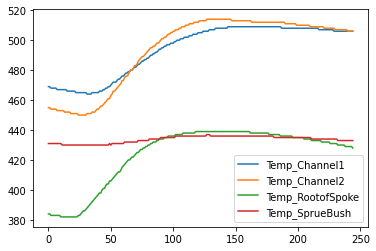

In [ ]:
wheel[temperature_columns].plot()

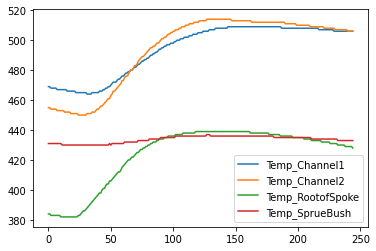

In [ ]:
w_id = '2019-07-15T2P8497S1'
wheel = data[data["wheel_id"] == w_id]

temperature_columns = [
 'Temp_Channel1',
 'Temp_Channel2',
 'Temp_RootofSpoke',
 'Temp_SprueBush'
]

wheel[temperature_columns].max()

wheel[temperature_columns].plot()

## Air Flow rate channel cycle

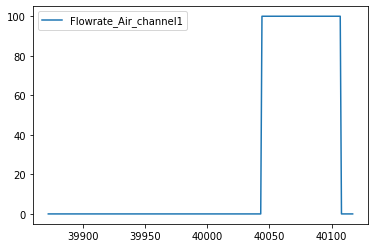

In [ ]:
w_id = '2019-07-16T1P8497S40'
wheel = data[data["wheel_id"] == w_id]

#pressure_columns = [
# 'Pressure_cycle'
#]


air_columns = [
 'Flowrate_Air_channel1'


]

wheel[pressure_columns].max()

wheel[air_columns].plot()

## All temperature sensor plots

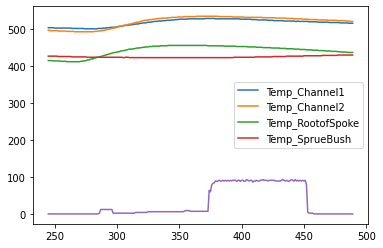

In [ ]:
w_id = '2019-07-15T2P8497S2'
wheel = data[data["wheel_id"] == w_id]

temperature_columns = [
 'Temp_Channel1',
 'Temp_Channel2',
 'Temp_RootofSpoke',
 'Temp_SprueBush'
]

air_columns = [
 'Flowrate_Air_channel1',
 'Flowrate_Air_channel2',
 'Flowrate_Air_channel3',
 'Flowrate_Air_channel4',
 'Flowrate_Air_channel5',
 'Flowrate_Air_channel6',
 'Flowrate_Air_channel7',
 'Flowrate_Air_channel8',
 'Flowrate_Air_channel9',
 'Flowrate_Air_channel10',
 'Flowrate_Air_channel11'

]

wheel[temperature_columns].max()

wheel[temperature_columns].plot()

wheel[air_columns[2]].plot()